In [31]:
# Prediction Candidates
# 2010 - 2011 Flu Season
# HHS Regions 5 and 9
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

data = pd.read_csv('WHO_NREVSS_Combined_2010_2011-HHS.csv', header=1)
data['T'] = data.apply(weekTransform, axis=1)
data = data.drop(["REGION TYPE"], axis=1)

data['TOTAL'] = data['A (H3)'] + data['A (Subtyping not Performed)']

dataHHS5 = data[data['REGION'] == 'Region 5']
dataHHS9 = data[data['REGION'] == 'Region 9']

X = dataHHS5['T']
Y = dataHHS5['A (H3)']
Y2 = dataHHS9['A (H3)']
Y3 = dataHHS5['A (Subtyping not Performed)']
Y4 = dataHHS9['A (Subtyping not Performed)']

Y5 = dataHHS5['TOTAL']
Y6 = dataHHS9['TOTAL']

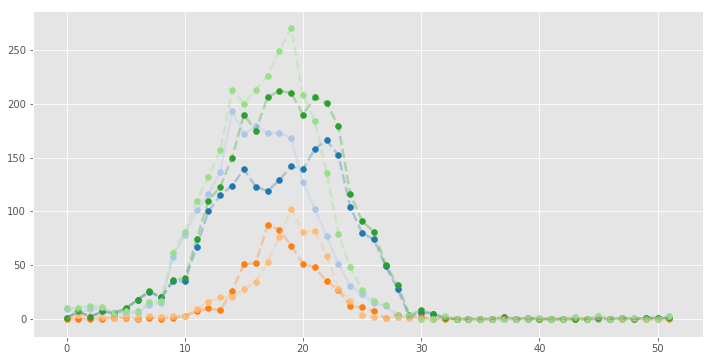

In [32]:
plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
plt.plot(X, Y2, lw=2.5, color=tableau20[1], alpha=0.3)
plt.scatter(X, Y2, color=tableau20[1])

plt.plot(X, Y3, ls="--", lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(X, Y3, color=tableau20[2])
plt.plot(X, Y4, ls="--", lw=2.5, color=tableau20[3], alpha=0.3)
plt.scatter(X, Y4, color=tableau20[3])

plt.plot(X, Y5, ls="--", lw=2.5, color=tableau20[4], alpha=0.3)
plt.scatter(X, Y5, color=tableau20[4])
plt.plot(X, Y6, ls="--", lw=2.5, color=tableau20[5], alpha=0.3)
plt.scatter(X, Y6, color=tableau20[5])